In [76]:
import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


file_path = r"C:\Users\thand\Downloads\SA_Accidents_2023_2024_500.csv"

df = pd.read_csv(file_path)


In [77]:
total_records = len(df)
print(f"Total records: {total_records}")

Total records: 500


In [78]:
numerical_columns = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']

numerical_stats = {}

for col in numerical_columns:
    data = df[col].dropna().tolist() 
    n = len(data)

    if n == 0:  
        continue  

    mean = sum(data) / n
    sorted_data = sorted(data)
    median = sorted_data[n // 2] if n % 2 != 0 else (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
    mode = max(set(data), key=data.count)
    min_val = min(data)
    max_val = max(data)
    value_range = max_val - min_val
    q1 = sorted_data[n // 4]
    q3 = sorted_data[3 * n // 4]
    iqr = q3 - q1
    variance = sum((x - mean) ** 2 for x in data) / (n - 1) if n > 1 else 0
    std_dev = variance ** 0.5
    skew = (3 * (mean - median)) / std_dev if std_dev != 0 else 0
    kurt = (sum((x - mean) ** 4 for x in data) / n) / (std_dev ** 4) - 3 if std_dev != 0 else 0

    numerical_stats[col] = {
        "Mean": mean,
        "Median (Q2)": median,
        "Mode": mode,
        "Min": min_val,
        "Max": max_val,
        "Range": value_range,
        "Q1": q1,
        "Q3": q3,
        "Interquartile Range": iqr,
        "Variance": variance,
        "Standard Deviation": std_dev,
        "Skewness": skew,
        "Kurtosis": kurt
    }

pprint.pprint(numerical_stats)


{'Number_of_Casualties': {'Interquartile Range': 3,
                          'Kurtosis': -1.3277365540975032,
                          'Max': 5,
                          'Mean': 2.53,
                          'Median (Q2)': 3.0,
                          'Min': 0,
                          'Mode': 4,
                          'Q1': 1,
                          'Q3': 4,
                          'Range': 5,
                          'Skewness': -0.8077352435884133,
                          'Standard Deviation': 1.7456214906953784,
                          'Variance': 3.047194388777555},
 'Number_of_Vehicles': {'Interquartile Range': 2,
                        'Kurtosis': -1.3814440147481784,
                        'Max': 4,
                        'Mean': 2.594,
                        'Median (Q2)': 3.0,
                        'Min': 1,
                        'Mode': 4,
                        'Q1': 2,
                        'Q3': 4,
                        'Range': 3,
      

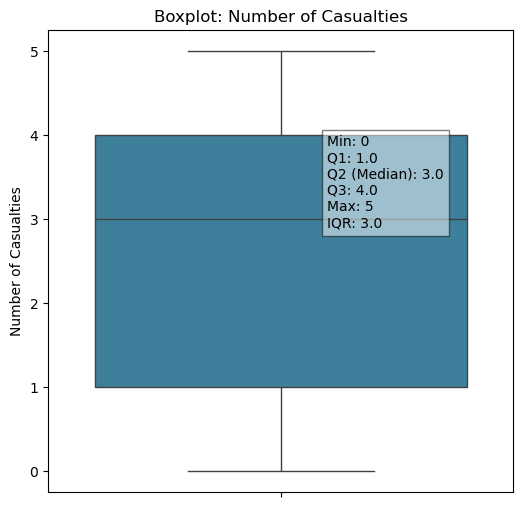

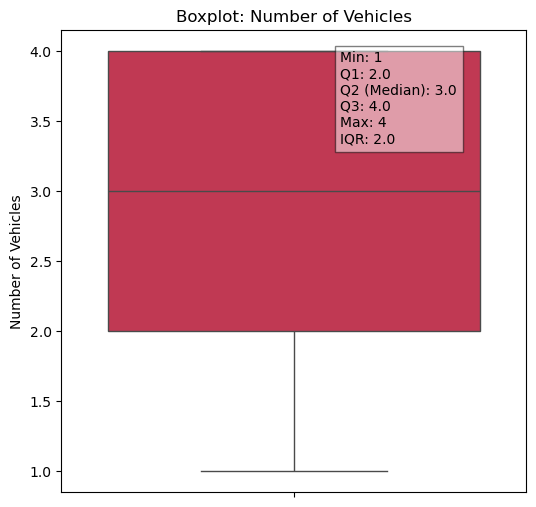

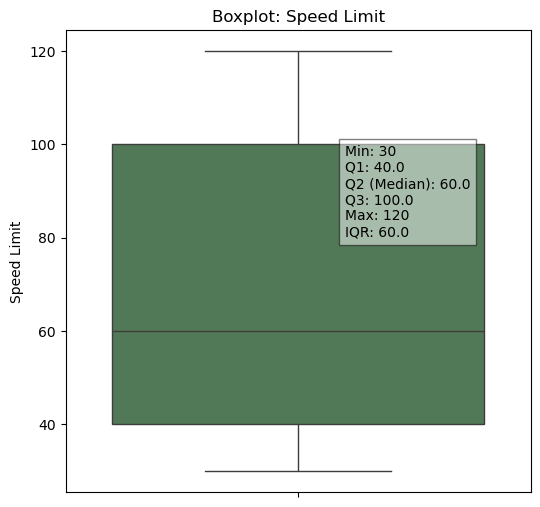

In [79]:
def create_boxplot(column, title, color):
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(y=df[column], color=color)
    

    Q1 = df[column].quantile(0.25)
    Q2 = df[column].median()
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_val = df[column].min()
    max_val = df[column].max()
    
    stats = f"Min: {min_val}\nQ1: {Q1}\nQ2 (Median): {Q2}\nQ3: {Q3}\nMax: {max_val}\nIQR: {IQR}"
    plt.text(0.1, Q3, stats, verticalalignment='top', fontsize=10, bbox=dict(facecolor='#FFFFFF', alpha=0.5))
    
    plt.title(f"Boxplot: {title}")
    plt.ylabel(title)
    plt.show()

create_boxplot('Number_of_Casualties', "Number of Casualties", '#2E86AB')
create_boxplot('Number_of_Vehicles', "Number of Vehicles", '#D62246')
create_boxplot('Speed_limit', "Speed Limit", '#4B7F52')
plt.show()


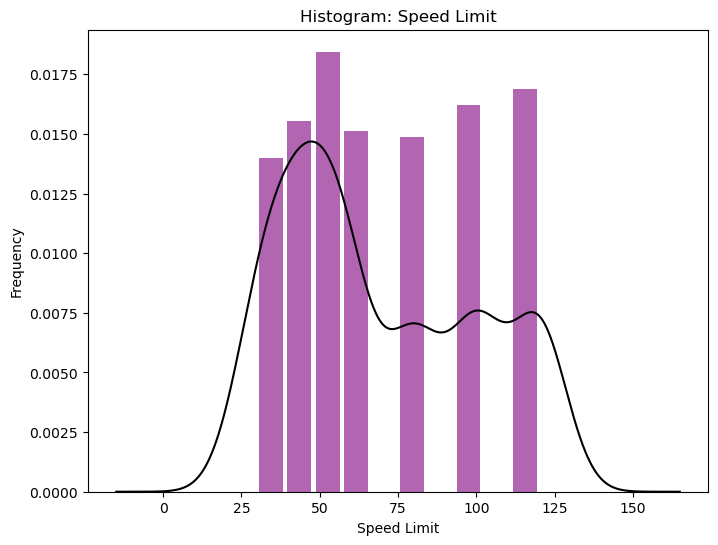

In [80]:
df['Speed_limit'].plot.hist(bins=10, density=True, alpha=0.6, color='#800080', figsize=(8, 6), rwidth=0.85)
df['Speed_limit'].plot.kde(color='#000000')
plt.title("Histogram: Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Frequency")
plt.show()

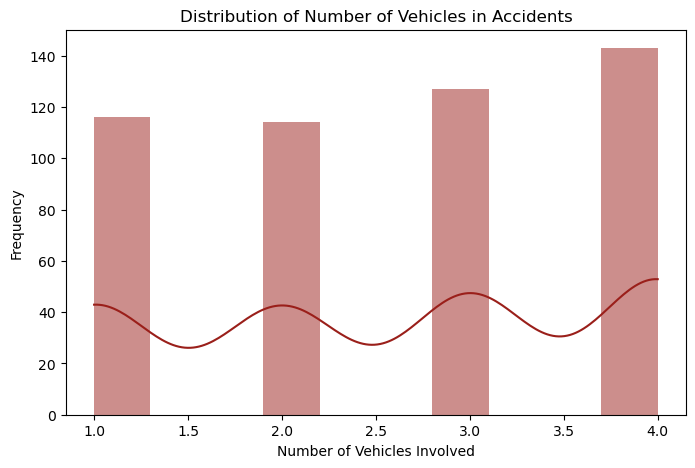

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df['Number_of_Vehicles'].dropna(), bins=10, kde=True, color='#9A1F1A', edgecolor='none',  linewidth=0)
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Frequency")  # Keeps original y-axis label/scale
plt.title("Distribution of Number of Vehicles in Accidents")
plt.show()

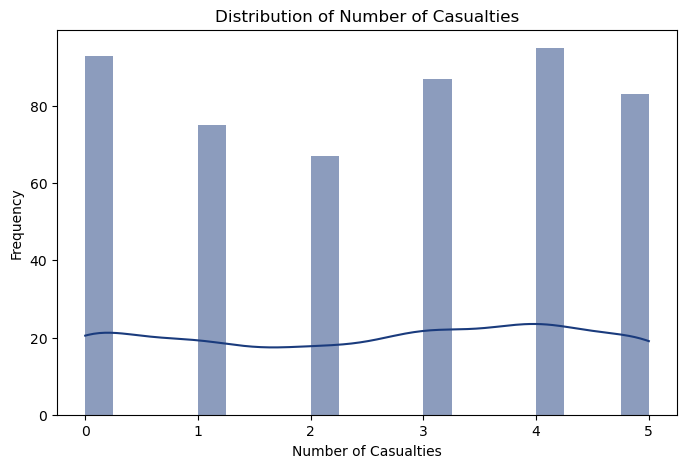

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(df["Number_of_Casualties"].dropna(), bins=20, kde=True, color="#1A3B7D", edgecolor='none',  linewidth=0)
plt.title("Distribution of Number of Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()

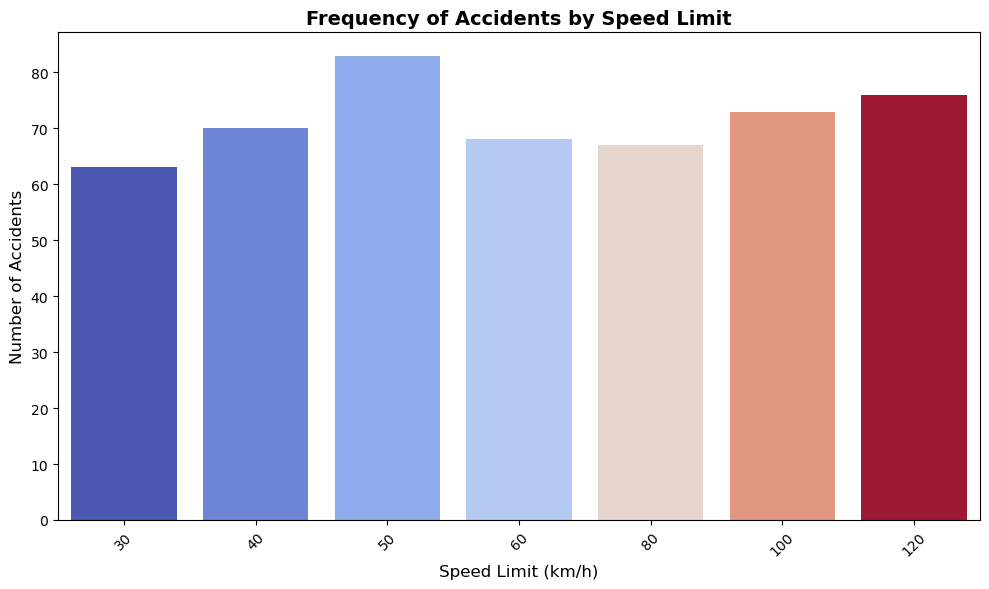

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Speed_limit',  hue='Speed_limit',  palette='coolwarm', order=sorted(df['Speed_limit'].dropna().unique()), legend=False)
plt.title('Frequency of Accidents by Speed Limit', fontsize=14, fontweight='bold')
plt.xlabel('Speed Limit (km/h)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

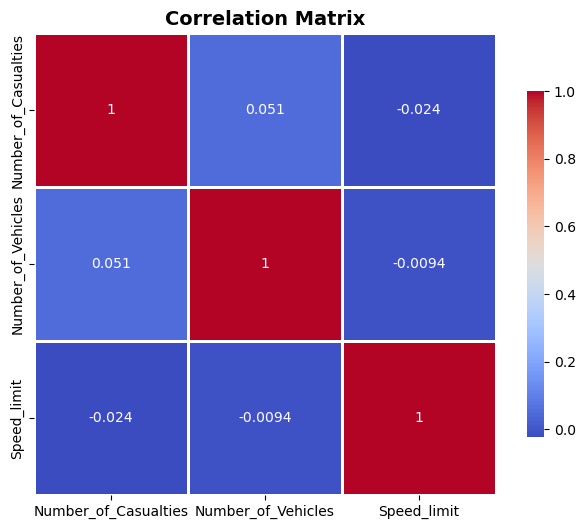

In [84]:
plt.figure(figsize=(8,6))
correlation = df[["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=1, linecolor='white', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [85]:
lat = df['Latitude']
lon = df['Longitude']

mean_lat = sum(lat)/len(lat)
mean_lon = sum(lon)/len(lon)

lat_range = max(lat) - min(lat)
lon_range = max(lon) - min(lon)

print(f"\nGeographic Center: ({mean_lat:.6f}, {mean_lon:.6f})")
print(f"Latitude Range: {lat_range:.6f} degrees")
print(f"Longitude Range: {lon_range:.6f} degrees")

grid = {}
for la, lo in zip(lat, lon):
    grid_key = (round(la,1), round(lo,1))
    grid[grid_key] = grid.get(grid_key, 0) + 1

max_density = max(grid.values())
dense_areas = [k for k,v in grid.items() if v == max_density]
print(f"\nHighest Accident Density Areas ({max_density} accidents):")
for area in dense_areas:
    print(f"  {area[0]:.1f}°S, {area[1]:.1f}°E")


Geographic Center: (-27.942899, 23.880762)
Latitude Range: 11.908580 degrees
Longitude Range: 15.969763 degrees

Highest Accident Density Areas (2 accidents):
  -24.8°S, 18.1°E
  -26.7°S, 21.2°E
  -24.1°S, 31.0°E
  -29.9°S, 28.3°E
  -22.4°S, 31.5°E
  -26.2°S, 26.8°E
  -28.1°S, 18.2°E
  -27.5°S, 28.1°E
  -28.4°S, 22.5°E
  -23.3°S, 20.0°E
  -31.5°S, 28.7°E


In [86]:
categorical_columns = ['Vehicle_Type','Light_Conditions', 'Day_of_Week', 'Weather_Conditions','Urban_or_Rural_Area','Accident_Severity']


In [87]:
vehicle_counts = {}
for vehicle in df ['Vehicle_Type']:
    found = False
    for key in vehicle_counts:
        if key == vehicle:
            vehicle_counts[key] += 1
            found = True
            break
    if not found:
        vehicle_counts[vehicle] = 1
        
vehicle_list = []
for vehicle, count in vehicle_counts.items():
    vehicle_list.append((count, vehicle))

n = len(vehicle_list)
for i in range(n):
    for j in range(0, n-i-1):
        if vehicle_list[j][0] < vehicle_list[j+1][0]:
            temp = vehicle_list[j]
            vehicle_list[j] = vehicle_list[j+1]
            vehicle_list[j+1] = temp
            
print("\nThe Types of Vehicles Involved in Accidents:")
for i in range(7):
    if i < len(vehicle_list):
        count, vehicle = vehicle_list[i]
        print(f"{i+1}. {vehicle}: {count} accidents")


The Types of Vehicles Involved in Accidents:
1. Bicycle: 80 accidents
2. Truck: 76 accidents
3. SUV: 72 accidents
4. Motorcycle: 70 accidents
5. Car: 70 accidents
6. Minibus Taxi: 68 accidents
7. Bus: 64 accidents


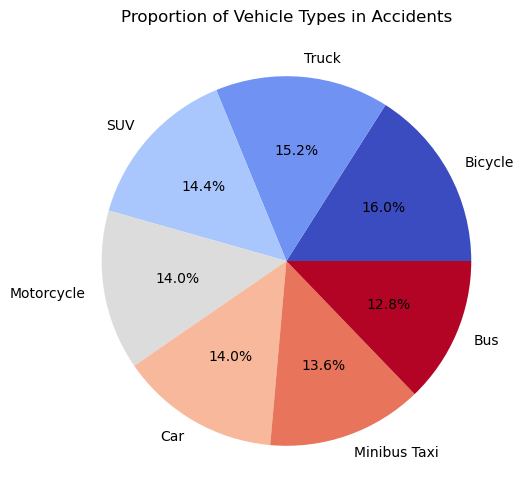

In [88]:
df['Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%', cmap="coolwarm", figsize=(6, 6))
plt.title("Proportion of Vehicle Types in Accidents")
plt.ylabel('')
plt.show()


In [89]:
light_counts = {}
for light in df['Light_Conditions']:
    light_counts[light] = light_counts.get(light, 0) + 1

print("\nLight Conditions During Accidents:")
for light, count in light_counts.items():
    print(f"{light}: {count} ({count/total_records*100:.1f}%)")


Light Conditions During Accidents:
Darkness - Street lights on: 172 (34.4%)
Daylight: 150 (30.0%)
Darkness - No street lighting: 178 (35.6%)


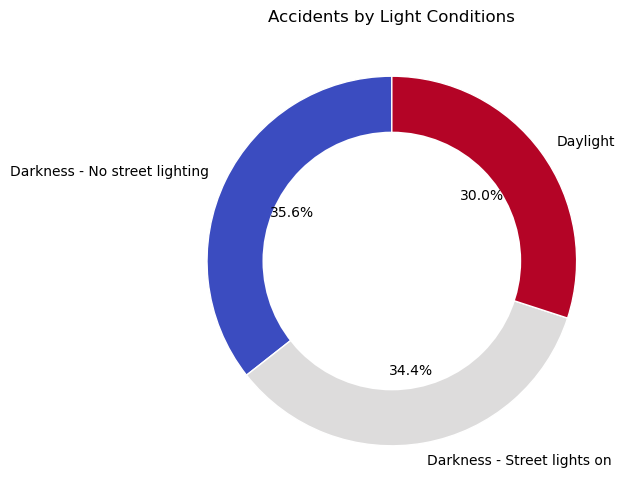

In [90]:
plt.figure(figsize=(6, 6))
df['Light_Conditions'].value_counts().plot.pie(
    autopct='%1.1f%%', cmap="coolwarm", startangle=90, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_patch(centre_circle)
plt.title("Accidents by Light Conditions")
plt.ylabel('') 
plt.show()

In [91]:
severity_counts = {}

for severity in df['Accident_Severity']:
    severity_counts[severity] = severity_counts.get(severity, 0) + 1
print("\nAccident Severity Distribution:")
for severity, count in severity_counts.items():
    print(f"{severity}: {count} ({count/total_records * 100:.1f}%)")



Accident Severity Distribution:
Fatal: 163 (32.6%)
Serious: 173 (34.6%)
Slight: 164 (32.8%)


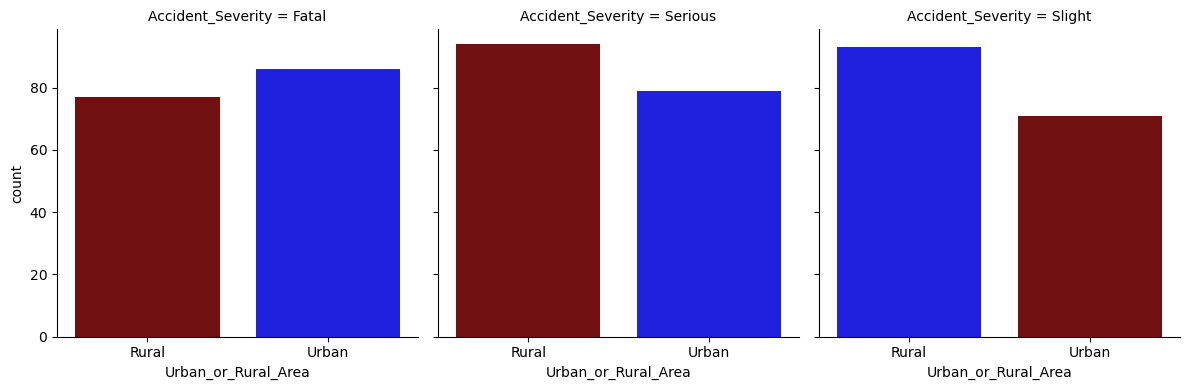

In [92]:
def countplot_with_order(x, **kwargs):
 sns.countplot(x=x, hue=x, legend=False, order=df['Urban_or_Rural_Area'].value_counts().index, palette=["#0000FF", "#800000"], **kwargs)
g = sns.FacetGrid(df, col="Accident_Severity", height=4, aspect=1)
g.map(countplot_with_order, "Urban_or_Rural_Area")
plt.show()

In [93]:
day_counts = {}
for day in df['Day_of_Week']:
    day_counts[day] = day_counts.get(day, 0) + 1

print("\nAccidents by Day of Week:")
for day, count in day_counts.items():
    print(f"{day}: {count} ({count/total_records*100:.1f}%)")


Accidents by Day of Week:
Monday: 74 (14.8%)
Friday: 75 (15.0%)
Wednesday: 64 (12.8%)
Thursday: 69 (13.8%)
Sunday: 70 (14.0%)
Saturday: 75 (15.0%)
Tuesday: 73 (14.6%)


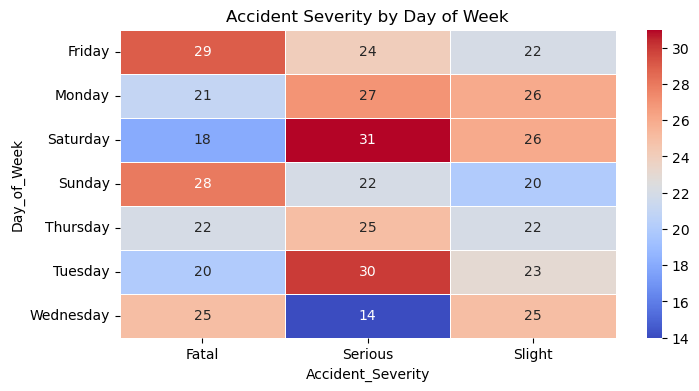

In [94]:
heatmap_data = pd.crosstab(df['Day_of_Week'], df['Accident_Severity'])
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title("Accident Severity by Day of Week")
plt.show()


In [95]:
weather_counts = {}
for weather in df['Weather_Conditions']:
    weather_counts[weather] = weather_counts.get(weather, 0) + 1

print("\nWeather Conditions During Accidents:")
for weather, count in weather_counts.items():
    print(f"{weather}: {count} ({count/total_records*100:.1f}%)")


Weather Conditions During Accidents:
Snow: 113 (22.6%)
Fog: 96 (19.2%)
Clear: 97 (19.4%)
Rain: 92 (18.4%)
Strong Winds: 102 (20.4%)


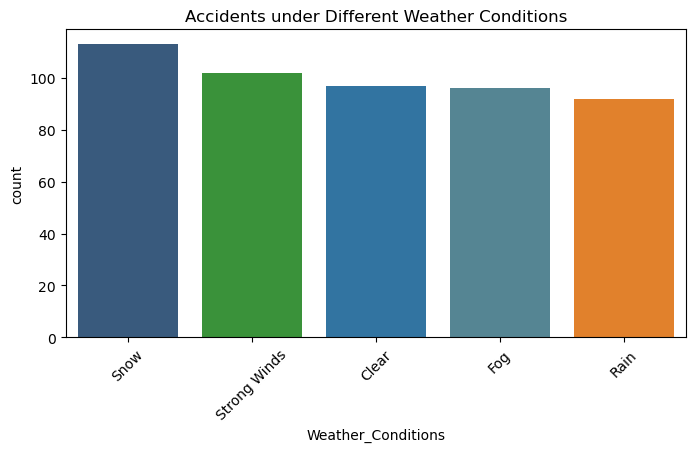

In [96]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Weather_Conditions", data=df, order=df["Weather_Conditions"].value_counts().index, hue="Weather_Conditions",  legend=False, palette=["#2E5A88", "#4B8B9D", "#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks(rotation=45)
plt.title("Accidents under Different Weather Conditions")
plt.show()

In [97]:
urban_rural_counts = {}
for area in df['Urban_or_Rural_Area']:
    urban_rural_counts[area] = urban_rural_counts.get(area, 0) + 1

print("\nUrban vs Rural Accidents:")
for area, count in urban_rural_counts.items():
    print(f"{area}: {count} ({count/total_records*100:.1f}%)")


Urban vs Rural Accidents:
Urban: 236 (47.2%)
Rural: 264 (52.8%)


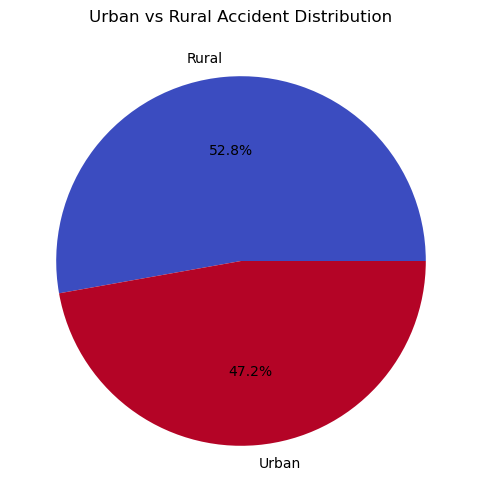

In [98]:
df['Urban_or_Rural_Area'].value_counts().plot.pie(autopct='%1.1f%%', cmap="coolwarm", figsize=(6, 6))
plt.title("Urban vs Rural Accident Distribution")
plt.ylabel('')
plt.show()
